# Support-Vector Machines

No Machine Learning, as **Support-Vector Machines** (SVMs, também conhecidas como support-vector networks) são modelos de **supervised learning** com algoritmos de aprendizagem associados que analisam dados para classificação e análise de regressão.

Desenvolvido na AT&T Bell Laboratories por Vladimir Vapnik com colegas (Boser et al., 1992, Guyon et al., 1993, Vapnik et al., 1997), SVMs são um dos métodos de predição mais robustos, sendo baseados em frameworks de aprendizagem estatística ou Teoria VC proposta por Vapnik (1982, 1995) e Chervonenkis (1974).

Dado um conjunto de exemplos de treinamento, cada um marcado como pertencente a uma de duas categorias, um algoritmo de treinamento SVM constrói um modelo que atribui novos exemplos a uma categoria ou outra, tornando-o um classificador linear binário não probabilístico. O SVM mapeia exemplos de treinamento para pontos no espaço de modo a maximizar a largura da lacuna entre as duas categorias. Novos exemplos são mapeados nesse mesmo espaço e considerados pertencentes a uma categoria com base em qual lado da lacuna eles se enquadram.

Além de realizar a classificação linear, os SVMs podem realizar com eficiência uma classificação não-linear usando o que é chamado de **kernel trick**, mapeando implicitamente seus **inputs** em espaços de features de alta dimensão.

Mais informações podem ser obtidas no [Wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine).

### Bibliotecas

Primeiramente vamos importar as bibliotecas necessárias para o estudo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dados

Vamos trabalhar com dados simulados de um experimento com camundongos infectados com um vírus e diversas doses de dois medicamentos ministradas a eles e medidas em mililitros, checaremos duas semanas depois para verificar se eles ainda estão infectados. 

Vamos então carregar e verificar os dados.

In [2]:
df = pd.read_csv('dados/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


Vamos visualizar os dados através de um **scatterplot** para ver a separação entre as classes e obter uma melhor intuição.

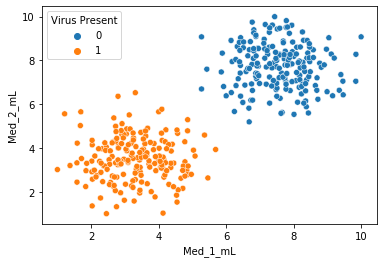

In [3]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df);

Claramente, como podemos observar, os dados são separáveis.

Vamos agora criar um hiperplano (uma reta) para separar os dados.

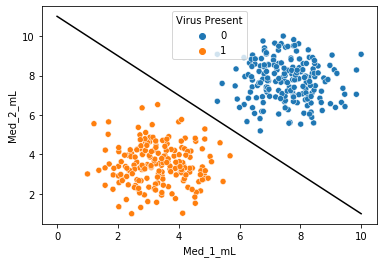

In [4]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df);

x = np.linspace(0,10,100)
m = -1
b = 11
y = m * x + b

plt.plot(x,y,'black');

### Modelo

E agora vamos explorar o algoritmo SVM para efetivamente classificar esses dados.

In [5]:
from sklearn.svm import SVC 

E separamos os dados em **X** e **y**.

In [6]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

Instanciamos o modelo **SVC**.

Iremos usar o **kernel** linear e um valor elevado de **C**.

In [7]:
model = SVC(kernel='linear', C=1000)

Ajustamos os dados ao modelo.

In [8]:
model.fit(X,y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

E agora vamos definir uma função **plot_svm_boundary** que irá desenhar uma margem para separar os dados no gráfico.

In [17]:
def plot_svm_boundary(model,X,y):
    X = X.values
    y = y.values
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='seismic')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

Vamos passar o modelo, as features (X) e as labels (y) como argumento e ele irá desenhar o hiperplano, as margens e os support vectors.

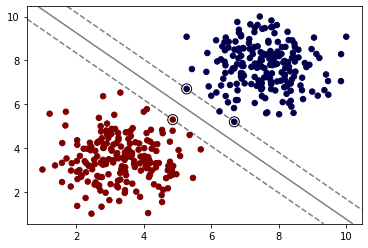

In [18]:
plot_svm_boundary(model, X, y)

Experimentaremos modelos com parâmetros diferentes para ver o impacto nos resultados.

In [19]:
modelo = SVC(kernel='linear', C=0.05)
modelo.fit(X, y)

SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Novamente vamos visualizar o gráfico.

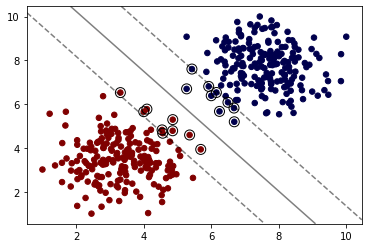

In [20]:
plot_svm_boundary(modelo, X, y)

Perceba que conforme nós diminuímos o valor de **C**, automaticamente estamos permitindo que mais pontos adentrem à margem.

Um valor apropriado para **C** depende muito do conjunto de dados que estamos trabalhando.

E agora, definiremos mais um modelo para irmos além de um **kernel** linear.

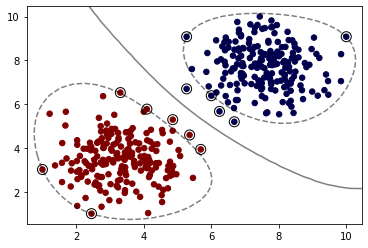

In [21]:
svc = SVC(kernel='rbf', C=1)
svc.fit(X, y)
plot_svm_boundary(svc, X, y)

Para conhecer mais detalhes sobre os parâmetros do algoritmo SVC, você pode visitar a **[documentação oficial](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)** do Scikit-Learn.

### Projeto

Neste pequeno projeto, tentaremos responder a seguinte questão:

Podemos detectar vinhos fraudulentos baseado em **features** de uma análise química?

Para saber mais sobre este tipo de fraude, há um artigo no [Wikipedia](https://en.wikipedia.org/wiki/Wine_fraud) que explica em maiores detalhes.

Como de costume, vamos começar carregando e observando os dados.

In [22]:
df = pd.read_csv('dados/wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


### Explorando os Dados

É interessante descobrirmos quais são as variáveis únicas na coluna **target** que desejamos prever (*quality*).

In [25]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

Criaremos um **countplot** que apresentará a contagem por categoria (Legit vs Fraud).

Queremos essencialmente responder a pergunta: os labels/targets estão balanceados ou não?

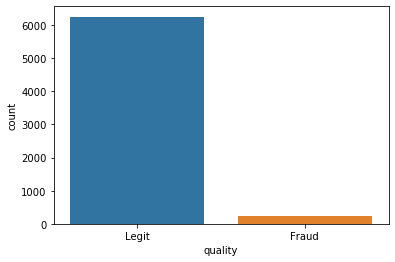

In [26]:
sns.countplot(data=df, x='quality');

Perceba que temos muito menos instâncias de Fraud, indicando um grande desequílibrio de classes.

A função **value_counts()** nos permite obter uma contagem desses valores.

In [27]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

Vamos agora descobrir se há uma diferença entre vinho vermelho e branco quando se trata de Fraud.

Para isso criaremos um **countplot** que tem o tipo de vinho no eixo x com a cor separando as colunas por Fraud vs Legit.

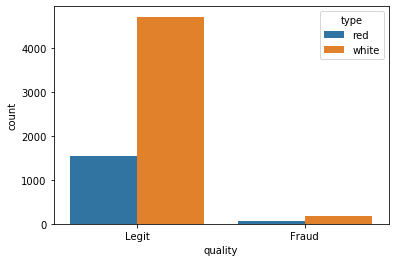

In [28]:
sns.countplot(data=df, x='quality', hue='type');

É interessante sabermos qual a porcentagem de vinhos vermelhos e brancos são fraud.

In [40]:
vermelhos = df[df['type'] == 'red']
brancos = df[df['type'] == 'white']

% de vermelhos que são fraudulentos.

In [41]:
len(vermelhos[vermelhos['quality'] == 'Fraud']) / len(vermelhos) * 100

3.9399624765478425

% de brancos que são fraudulentos.

In [44]:
len(brancos[brancos['quality'] == 'Fraud']) / len(brancos) * 100

3.7362188648427925

Calcularemos a correlação entre várias **features** e a coluna *quality*.

In [45]:
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

In [49]:
corr = df.corr()['Fraud'][:-1].sort_values()
corr

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Name: Fraud, dtype: float64

E agora podemos projetar os dados em um gráfico de barras.

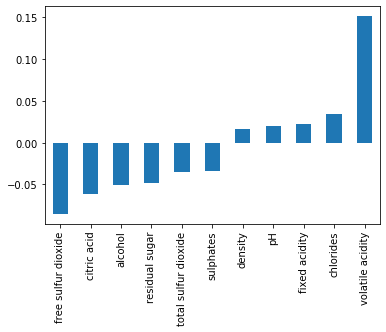

In [53]:
corr.plot(kind='bar');

Aparentemente **volatile acidity** pode ser um feature de relevância para investigarmos.

Criaremos agora um **clustermap** dos valores de correlação dos vinhos.

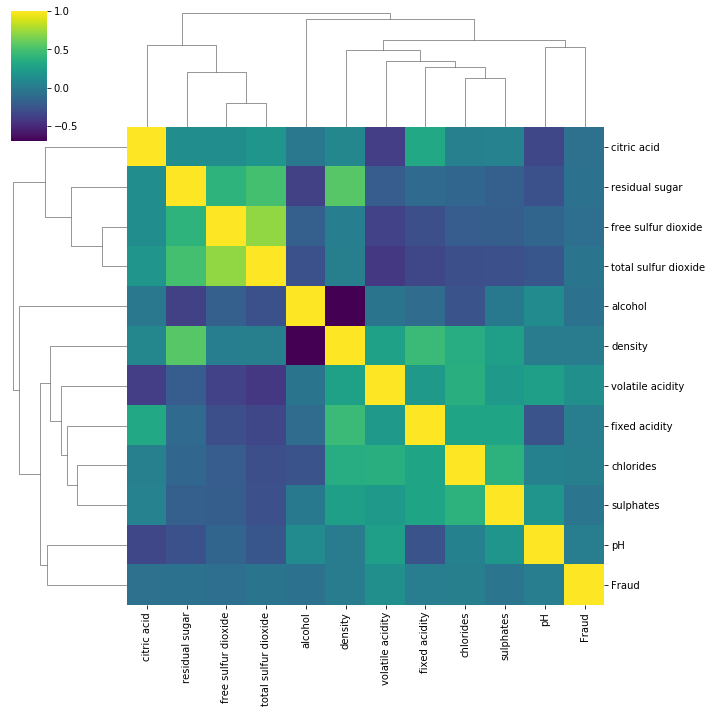

In [56]:
sns.clustermap(df.corr(), cmap='viridis');

### Modelo de Machine Learning

Uma vez que exploramos os dados e obtivemos um certo conhecimento em relação aos mesmos, podemos iniciar a construção de nosso modelo.

Antes disso, devemos eliminar a coluna **Fraud** que criamos anteriormente.

In [57]:
df.drop('Fraud', axis=1, inplace=True)

Feito isso, nossa primeira tarefa será converter a coluna categórica **type** de uma string "red" ou "white" para variáveis dummy.

In [59]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [61]:
df.tail(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6489,6.1,0.34,0.29,2.2,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,Legit,1
6490,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,Legit,1
6491,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,Legit,1
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,Legit,1


Agora iremos separar os dados em features **X** e target labels **y** (coluna '*quality*').

In [62]:
X = df.drop('quality', axis=1)
y = df['quality']

Finalmente podemos executar o **train_test_split** para separar os dados em conjunto de treinamento e teste.

Usaremos um conjunto de teste de 10% de tamanho.

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Vamos escalar os dados **X_train** e **X_test** para facilitar o trabalho do algoritmo **SVC**.

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Criaremos uma instância do classificador Support Vector Machine.

Tendo em vista que sabemos que as classes de nossos dados estão desequilibradas, em uma tentativa de minimizar este problema, podemos ajustar automaticamente os **weights** inversamente proporcionais às frequências da classe nos dados de **input** com uma chamada de argumento no `SVC()`.

In [66]:
modelo_svc = SVC(class_weight='balanced')

Usaremos **GridSearchCV** para executar um grid search para os melhores parâmetros de **C** e **gamma**.

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1],'gamma': ['scale', 'auto']}

In [69]:
grid = GridSearchCV(modelo_svc, param_grid)

E agora ajustamos os dados ao nosso modelo encontrado.

In [70]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Podemos verificar quais são os melhores parâmetros.

In [71]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

### Avaliando o Modelo

Para avaliação do modelo, vamos começar apresentando a matriz de confusão.

In [72]:
from sklearn.metrics import confusion_matrix

grid_preds = grid.predict(scaled_X_test)
confusion_matrix(y_test, grid_preds)

array([[ 11,   7],
       [ 99, 533]])

Também podemos usar a função gráfica da matriz de confusão para melhor visualização.

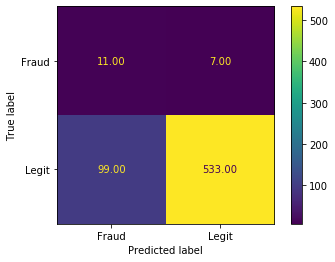

In [76]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid, scaled_X_test, y_test, values_format='.2f');

Finalmente apresentamos o classification report.

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

       Fraud       0.10      0.61      0.17        18
       Legit       0.99      0.84      0.91       632

    accuracy                           0.84       650
   macro avg       0.54      0.73      0.54       650
weighted avg       0.96      0.84      0.89       650



Observamos que o **precision** e **recall** para os vinhos fraudulentos está relativamente ruim, isso de deve principalmente ao fato de que estamos trabalhando com classes não-balanceadas e falsos positivos podem afetar o desempenho do modelo nessas métricas.